<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [ ]:
#|eval: false
!pip list | grep matplotlib

matplotlib                    3.7.2
matplotlib-inline             0.1.6


## Setup

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib
print(matplotlib.__version__)

3.7.2


## Basic Plotting

<BarContainer object of 4 artists>

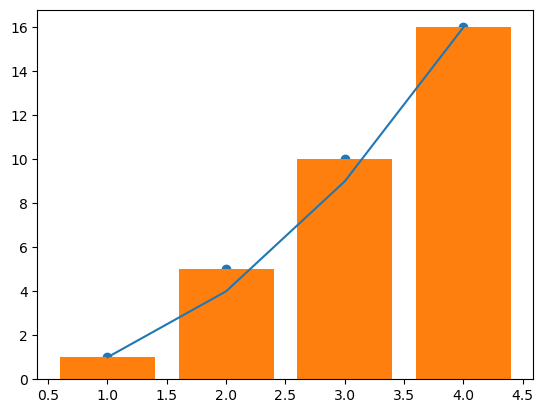

In [ ]:
plt.plot([1,2,3,4], [1,4,9,16]) #line plot
plt.scatter([1,2,3,4], [1,5,10,16]) #scatter plot
plt.bar([1,2,3,4], [1,5,10,16]) #bar plot

(array([4., 0., 0.]),
 array([ 1.,  5., 10., 16.]),
 <BarContainer object of 3 artists>)

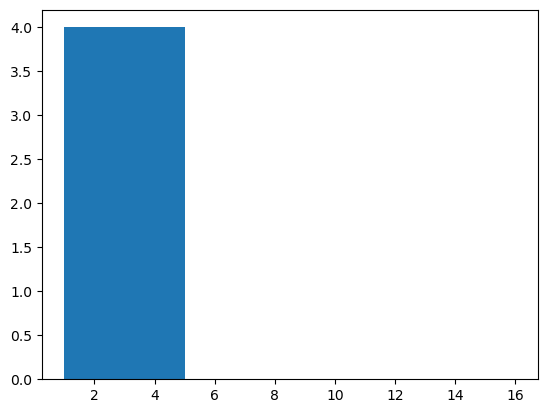

In [ ]:
plt.hist([1,2,3,4], [1,5,10,16]) #scatter plot

## Figures and Axes

Text(0.5, 1.0, 'Title')

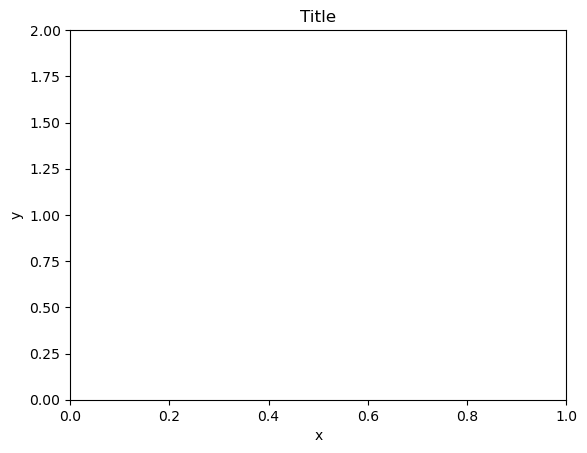

In [ ]:
fig, ax = plt.subplots()
ax.set_ylim([0,2])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Title')

## Customizing Plots

(0.0, 20.0)

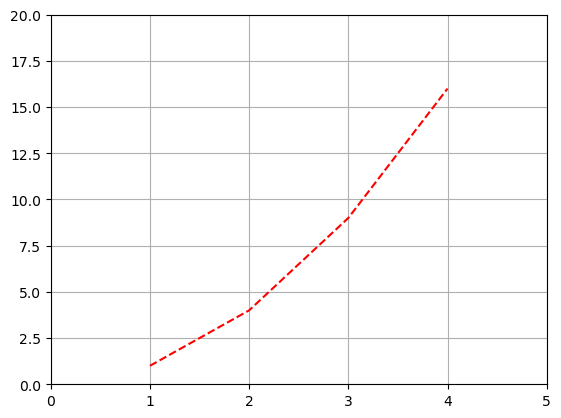

In [ ]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16],
         linestyle = '--',
         color = 'r')
plt.grid(True)
plt.xlim(0, 5)
plt.ylim(0, 20)

## Multiple Plots

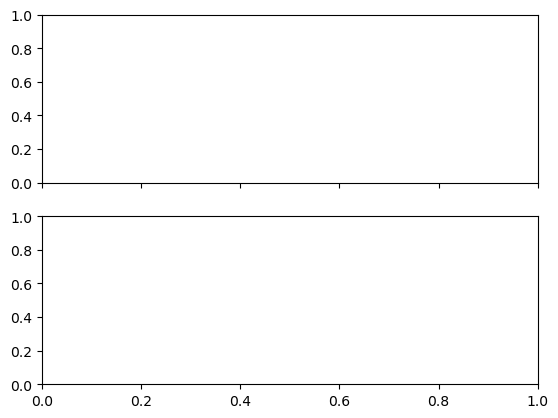

In [ ]:
fig, ax = plt.subplots(2, 
                      sharex = True,
                      sharey = True)

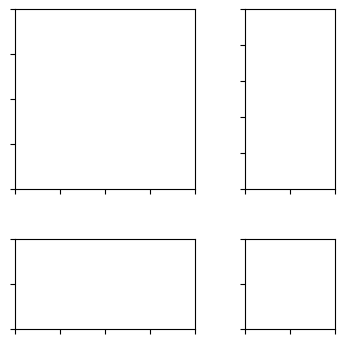

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import Divider
import mpl_toolkits.axes_grid1.axes_size as Size

fig = plt.figure(figsize=(5.5, 4))

# the rect parameter will be ignored as we will set axes_locator
rect = (0.1, 0.1, 0.8, 0.8)
ax = [fig.add_axes(rect, label="%d" % i) for i in range(4)]


horiz = [Size.AxesX(ax[0]), Size.Fixed(.5), Size.AxesX(ax[1])]
vert = [Size.AxesY(ax[0]), Size.Fixed(.5), Size.AxesY(ax[2])]

# divide the axes rectangle into grid whose size is specified by horiz * vert
divider = Divider(fig, rect, horiz, vert, aspect=False)


ax[0].set_axes_locator(divider.new_locator(nx=0, ny=0))
ax[1].set_axes_locator(divider.new_locator(nx=2, ny=0))
ax[2].set_axes_locator(divider.new_locator(nx=0, ny=2))
ax[3].set_axes_locator(divider.new_locator(nx=2, ny=2))

ax[0].set_xlim(0, 2)
ax[1].set_xlim(0, 1)

ax[0].set_ylim(0, 1)
ax[2].set_ylim(0, 2)

divider.set_aspect(1.)

for ax1 in ax:
    ax1.tick_params(labelbottom=False, labelleft=False)

plt.show()

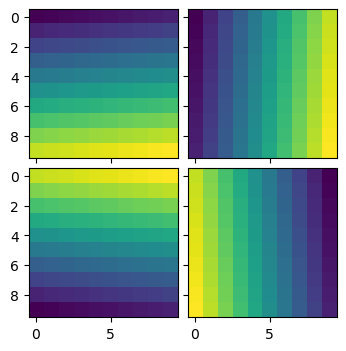

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axes_grid1 import ImageGrid

im1 = np.arange(100).reshape((10, 10))
im2 = im1.T
im3 = np.flipud(im1)
im4 = np.fliplr(im2)

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)

plt.show()

## Text and Annotations 

Text(0.5, 0.5, 'Hello')

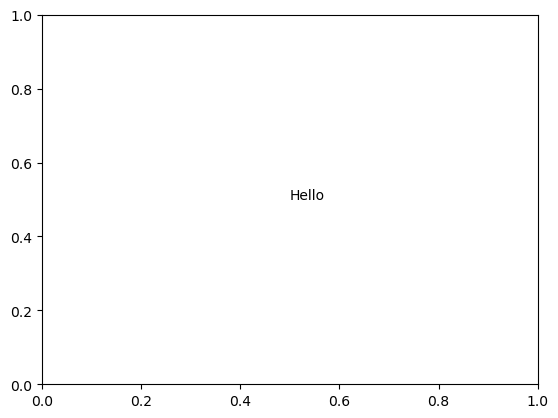

In [ ]:
plt.text(0.5, 0.5, 'Hello')

Text(0.6, 0.6, 'Hello')

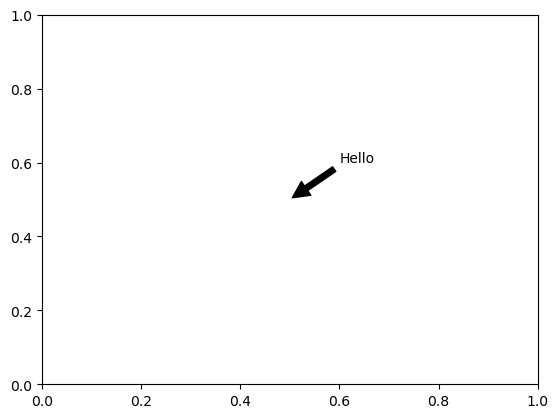

In [ ]:
arrowprops=dict(facecolor='black', shrink=0.05)

plt.annotate('Hello', xy=(0.5, 0.5),
             xytext=(0.6, 0.6),
             arrowprops=arrowprops)

## Saving Figures

In [ ]:
plt.savefig('Data/test_figure.svg')

<Figure size 640x480 with 0 Axes>

## Animation

In [ ]:
#|eval: false
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch
from IPython.display import HTML

fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(0, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con

plt.close()

ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)
HTML(ani.to_jshtml())

In [ ]:
#|eval: false
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.random.random(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(walk[:num, :2].T)
        line.set_3d_properties(walk[:num, 2])
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 10
walks = [random_walk(num_steps) for index in range(15)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

plt.close()

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

HTML(ani.to_jshtml())

## 3D plots

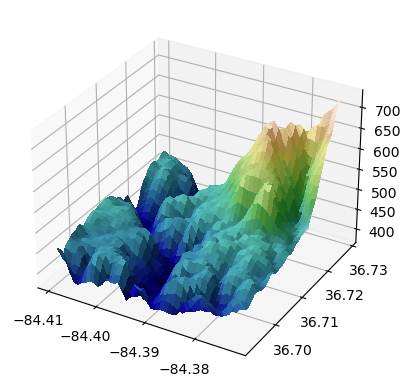

In [ ]:
#|eval: false
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cbook, cm
from matplotlib.colors import LightSource

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load = True)

z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

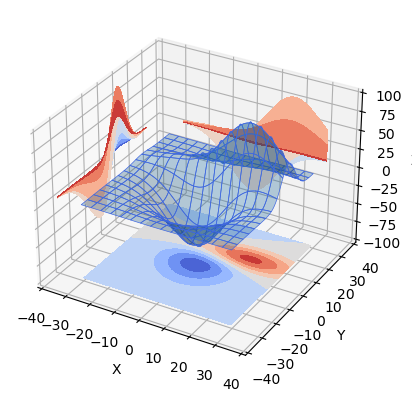

In [ ]:
#|eval: false
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

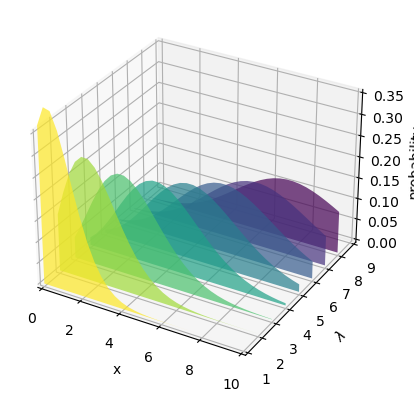

In [ ]:
#|eval: false
import math

import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import PolyCollection

# Fixing random state for reproducibility
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure().add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
lambdas = range(1, 9)

# verts[i] is a list of (x, y) pairs defining polygon i.
gamma = np.vectorize(math.gamma)
verts = [polygon_under_graph(x, l**x * np.exp(-l) / gamma(x + 1))
         for l in lambdas]
facecolors = plt.colormaps['viridis_r'](np.linspace(0, 1, len(verts)))

poly = PolyCollection(verts, facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0, 10), ylim=(1, 9), zlim=(0, 0.35),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()

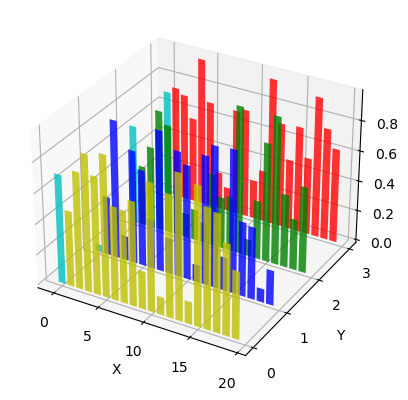

In [ ]:
#|eval: false
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()